In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

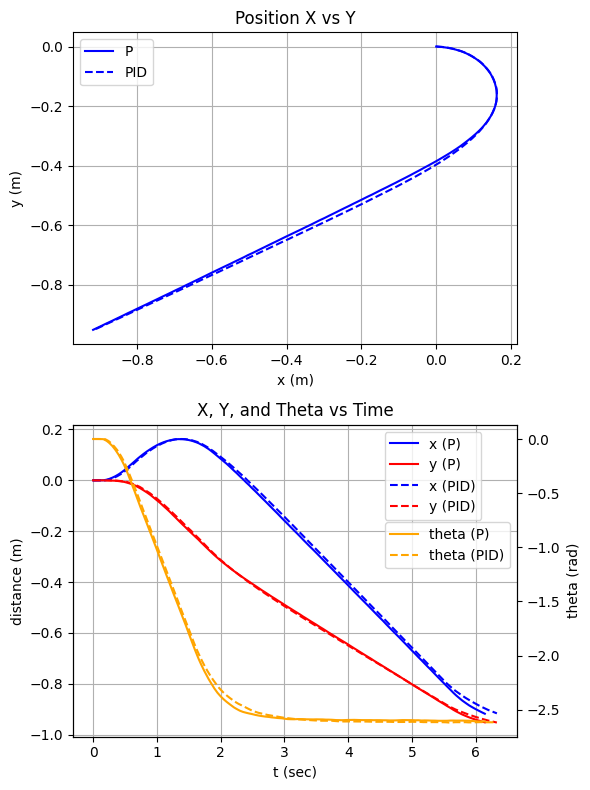

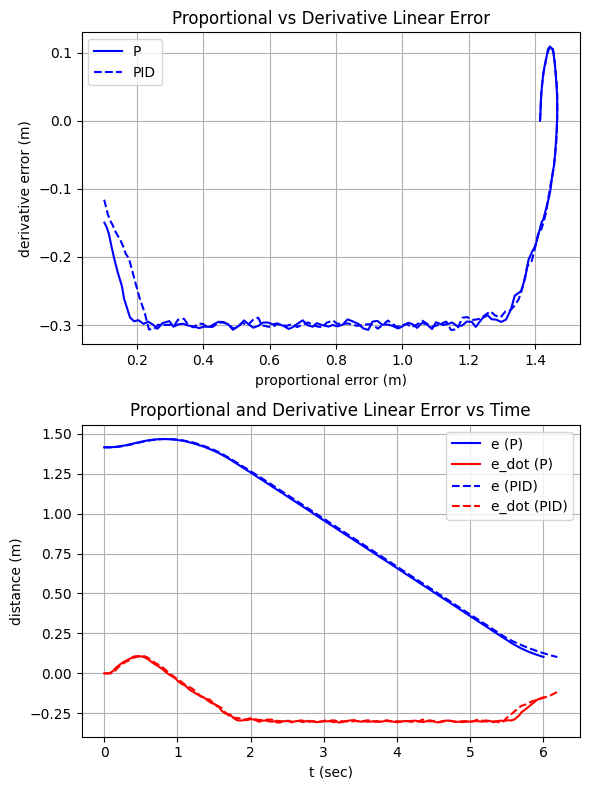

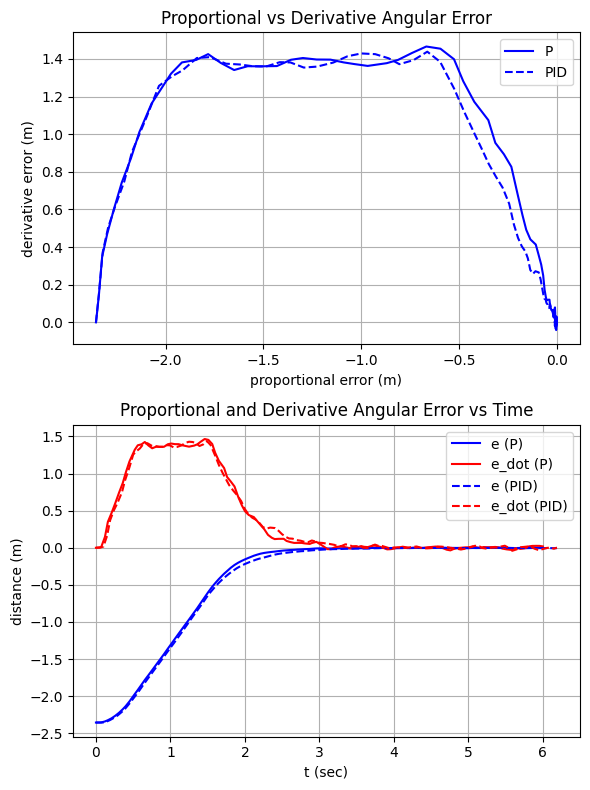

In [176]:
def plot_point_pose(filename1, filename2):

    df = pd.read_csv(filename1)
    theta1 = df['theta'].to_numpy()
    x1 = df['x'].to_numpy()
    y1 = df['y'].to_numpy()
    t1 = df['stamp'].to_numpy()
    t1 = (t1 - t1[0]) / 1e9 # Convert the 'stamp' column from nanoseconds to seconds

    df = pd.read_csv(filename2)
    theta2 = df['theta'].to_numpy()
    x2 = df['x'].to_numpy()
    y2 = df['y'].to_numpy()
    t2 = df['stamp'].to_numpy()
    t2 = (t2 - t2[0]) / 1e9

    fig, axes = plt.subplots(2, 1, figsize=(6,8))

    axes[0].plot(x1, y1, label='P', color='blue')
    axes[0].plot(x2, y2, label='PID', color='blue', linestyle='--')
    axes[0].set_title('Position X vs Y')
    axes[0].set_xlabel('x (m)')
    axes[0].set_ylabel('y (m)')
    axes[0].legend()
    axes[0].grid(True)

    axes[1].plot(t1, x1, label='x (P)', color='blue')
    axes[1].plot(t1, y1, label='y (P)', color='red')
    axes[1].plot(t2, x2, label='x (PID)', color='blue', linestyle='--')
    axes[1].plot(t2, y2, label='y (PID)', color='red', linestyle='--')
    axes[1].set_title('X, Y, and Theta vs Time')
    axes[1].set_xlabel('t (sec)')
    axes[1].set_ylabel('distance (m)')
    axes[1].legend(bbox_to_anchor=(0.935, 1))

    axes_theta = axes[1].twinx()
    axes_theta.plot(t1, theta1, label='theta (P)', color='orange')
    axes_theta.plot(t2, theta2, label='theta (PID)', color='orange', linestyle='--')
    axes_theta.set_xlabel('t (sec)')
    axes_theta.set_ylabel('theta (rad)')
    axes_theta.legend(loc='upper right', bbox_to_anchor=(1, 0.71))

    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


def plot_point_error(filename1, filename2):

    error_type = "Linear" if "linear" in filename1.lower() else "Angular"

    df = pd.read_csv(filename1)
    e1 = df['e'].to_numpy()
    e_dot1 = df['e_dot'].to_numpy()
    t1 = df['stamp'].to_numpy()
    t1 = (t1 - t1[0]) / 1e9

    df = pd.read_csv(filename2)
    e2 = df['e'].to_numpy()
    e_dot2 = df['e_dot'].to_numpy()
    t2 = df['stamp'].to_numpy()
    t2 = (t2 - t2[0]) / 1e9

    fig, axes = plt.subplots(2, 1, figsize=(6,8))

    axes[0].plot(e1, e_dot1, label='P', color='blue')
    axes[0].plot(e2, e_dot2, label='PID', color='blue', linestyle='--')
    axes[0].set_title(f'Proportional vs Derivative {error_type} Error')
    axes[0].set_xlabel('proportional error (m)')
    axes[0].set_ylabel('derivative error (m)')
    axes[0].legend()
    axes[0].grid(True)
    
    axes[1].plot(t1, e1, label='e (P)', color='blue')
    axes[1].plot(t1, e_dot1, label='e_dot (P)', color='red')
    axes[1].plot(t2, e2, label='e (PID)', color='blue', linestyle='--')
    axes[1].plot(t2, e_dot2, label='e_dot (PID)', color='red', linestyle='--')
    axes[1].set_title(f'Proportional and Derivative {error_type} Error vs Time')
    axes[1].set_xlabel('t (sec)')
    axes[1].set_ylabel('distance (m)')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


plot_point_pose('Point_P_controller/robot_pose.csv', 'Point_PID_controller/robot_pose.csv')
plot_point_error('Point_P_controller/linear_errors.csv', 'Point_PID_controller/linear_errors.csv')
plot_point_error('Point_P_controller/angular_errors.csv', 'Point_PID_controller/angular_errors.csv')

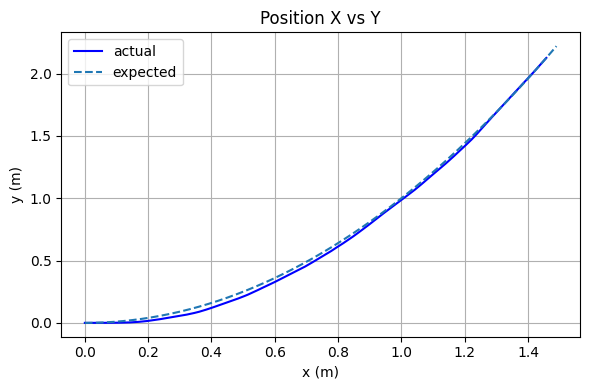

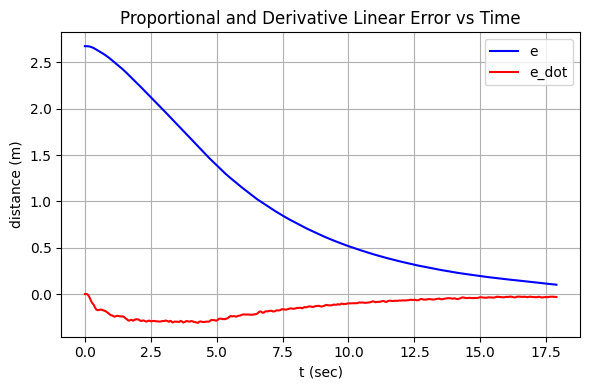

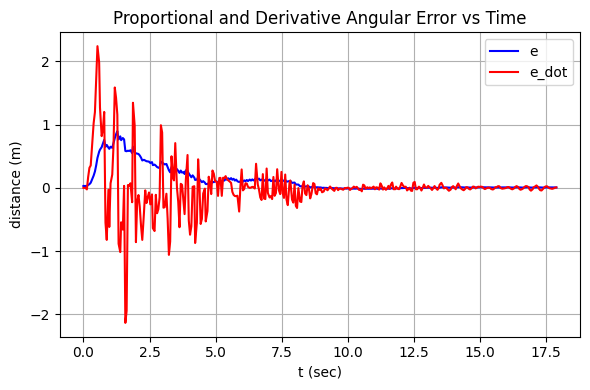

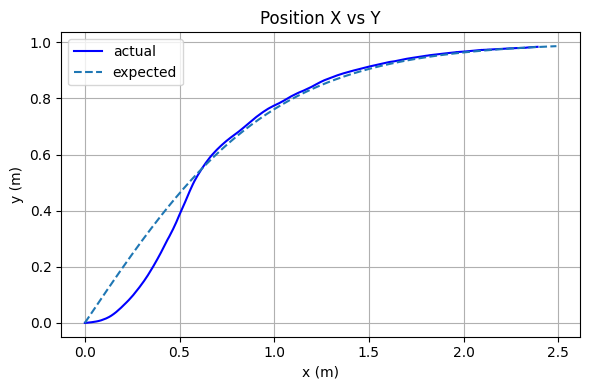

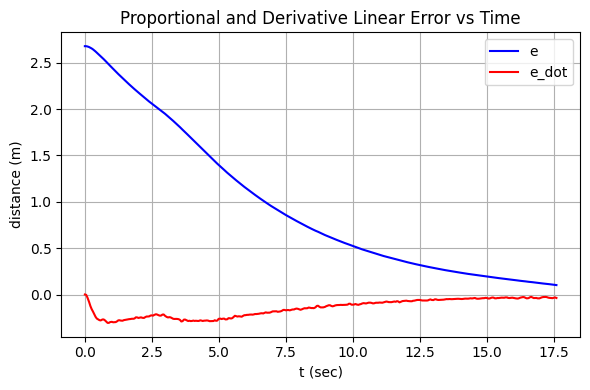

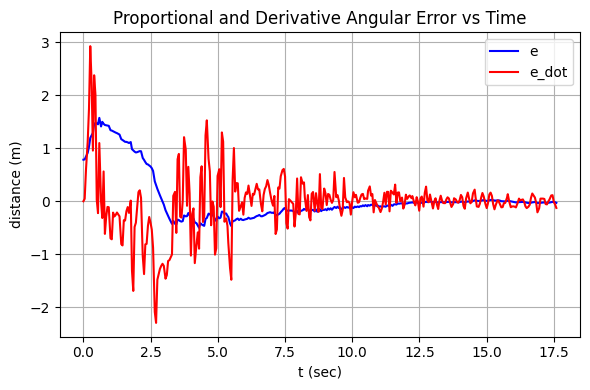

In [168]:
x_t_sigmoid = np.arange(int(2.5 * 100)) / 100
x_t_parabola = np.arange(int(1.5 * 100)) / 100

sigmoid = 2 / (1 + np.exp(-2 * x_t_sigmoid)) - 1
parabola = np.square(x_t_parabola)


def plot_trajectory_pose(filename):

    trajectory = "parabola" if "parabola" in filename.lower() else "sigmoid"

    df = pd.read_csv(filename)
    theta = df['theta'].to_numpy()
    x = df['x'].to_numpy()
    y = df['y'].to_numpy()
    t = df['stamp'].to_numpy()
    t = (t - t[0]) / 1e9 # Convert the 'stamp' column from nanoseconds to seconds

    plt.figure(figsize=(6,4))
    plt.plot(x, y, label='actual', color='blue')

    if trajectory == "parabola":
        plt.plot(x_t_parabola, parabola, label='expected', linestyle='--')
    elif trajectory == "sigmoid":
        plt.plot(x_t_sigmoid, sigmoid, label='expected', linestyle='--')
    plt.title('Position X vs Y')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


def plot_trajectory_error(filename):

    error_type = "Linear" if "linear" in filename.lower() else "Angular"

    df = pd.read_csv(filename)
    e = df['e'].to_numpy()
    e_dot = df['e_dot'].to_numpy()
    t = df['stamp'].to_numpy()
    t = (t - t[0]) / 1e9
    
    plt.figure(figsize=(6,4))
    plt.plot(t, e, label='e', color='blue')
    plt.plot(t, e_dot, label='e_dot', color='red')
    plt.title(f'Proportional and Derivative {error_type} Error vs Time')
    plt.xlabel('t (sec)')
    plt.ylabel('distance (m)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


plot_trajectory_pose('Parabola_PID_controller/robot_pose.csv')
plot_trajectory_error('Parabola_PID_controller/linear_errors.csv')
plot_trajectory_error('Parabola_PID_controller/angular_errors.csv')

plot_trajectory_pose('Sigmoid_PID_controller/robot_pose.csv')
plot_trajectory_error('Sigmoid_PID_controller/linear_errors.csv')
plot_trajectory_error('Sigmoid_PID_controller/angular_errors.csv')

In [195]:
def controller_metrics(filename):

    df = pd.read_csv(filename)
    theta = df['theta'].to_numpy()
    x = df['x'].to_numpy()
    y = df['y'].to_numpy()
    t = df['stamp'].to_numpy()
    t = (t - t[0]) / 1e9

    position_error = []

    for i in range(len(x)):
        position_error.append(np.sqrt((-1 - x[i])**2 + (-1 - y[i])**2))
    
    max_error = max(position_error)
    start_error = np.sqrt(2)
    accuracy = (1 - (position_error[-1] / start_error)) * 100
    overshoot = ((max_error - start_error) / start_error) *100

    print(f'accuracy: {accuracy}')
    print(f'overshoot: {overshoot}')


controller_metrics('Point_P_controller/robot_pose.csv')
controller_metrics('Point_PID_controller/robot_pose.csv')

accuracy: 93.20865987447858
overshoot: 3.6542757710976974
accuracy: 93.14600272285678
overshoot: 3.6827430840639623
